In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
ast = pd.read_csv('../data/asian_ast.csv')
ast = ast.drop('Unnamed: 0', axis=1)
ast

,Country,ISO3,Indicator,Unit,2018,2019,2020,2021,2022
0,"Afghanistan, Islamic Rep. of",AFG,Temperature change with respect to a baseline ...,Degree Celsius,1.624,0.991,0.587,1.475,2.154
1,"Armenia, Rep. of",ARM,Temperature change with respect to a baseline ...,Degree Celsius,2.739,1.864,1.954,2.183,1.845
2,"Azerbaijan, Rep. of",AZE,Temperature change with respect to a baseline ...,Degree Celsius,2.131,1.878,1.889,1.958,2.029
3,"Bahrain, Kingdom of",BHR,Temperature change with respect to a baseline ...,Degree Celsius,2.280,2.127,1.989,2.421,1.971
4,Bangladesh,BGD,Temperature change with respect to a baseline ...,Degree Celsius,0.911,1.151,0.934,1.326,1.240
5,Bhutan,BTN,Temperature change with respect to a baseline ...,Degree Celsius,1.221,1.136,1.035,1.648,1.456
6,Brunei Darussalam,BRN,Temperature change with respect to a baseline ...,Degree Celsius,0.903,1.221,1.222,0.972,1.048
7,Cambodia,KHM,Temperature change with respect to a baseline ...,Degree Celsius,0.655,1.370,1.275,0.786,0.886
8,"China, P.R.: Hong Kong",HKG,Temperature change with respect to a baseline ...,Degree Celsius,1.218,1.783,1.835,1.964,1.369
9,"China, P.R.: Macao",MAC,Temperature change with respect to a baseline ...,Degree Celsius,1.218,1.783,1.835,1.964,1.369


In [15]:
ast.describe()

,2018,2019,2020,2021,2022
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.450220,1.458520,1.477040,1.594660,1.519460
std,0.651552,0.365878,0.483116,0.535073,0.530729
min,0.333000,0.443000,0.059000,0.428000,0.559000
25%,0.908750,1.221500,1.276500,1.142750,1.190750
50%,1.231500,1.495000,1.500500,1.643500,1.391000
75%,2.112250,1.764750,1.819250,1.964000,1.862500
max,2.739000,2.127000,2.800000,2.661000,2.665000


Trực quan sự thay đổi nhiệt độ bề mặt trung bình (đơn vị Celsius) các quốc gia châu Á trong khoảng 2018-2022

In [16]:
def temperature_change_plot(df, show_value=True, years=None, title="Temperature Change Over Years"):
    if years is None:
        years = [col for col in df.columns if col.isdigit()]
        
    fig, axs = plt.subplots(1, len(years), figsize=(15, 10), sharex=True, sharey=True)
    colors = sns.color_palette('husl', len(years))
    one_year = True if len(years) == 1 else False
    
    for i, year in enumerate(years):
        value = df[year]
        value.index = df['Country']
        value = value.sort_values()[::-1]
        
        if one_year:
            bars = value.plot(kind='barh', stacked=True, ax=axs, color=colors[i])
            axs.set_ylabel("")
            axs.set_title(f"{year}")
            axs.grid(False)
            for spine in ["left", "right", "top", "bottom"]:
                axs.spines[spine].set_visible(False)
            axs.tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')
            break
        else:
            bars = value.plot(kind='barh', stacked=True, ax=axs[i], color=colors[i])
            axs[i].set_ylabel("")
            axs[i].set_title(f"{year}")
            axs[i].grid(False)
            for spine in ["left", "right", "top", "bottom"]:
                axs[i].spines[spine].set_visible(False)
            axs[i].tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')
                    
    plt.suptitle(title, fontsize=11)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

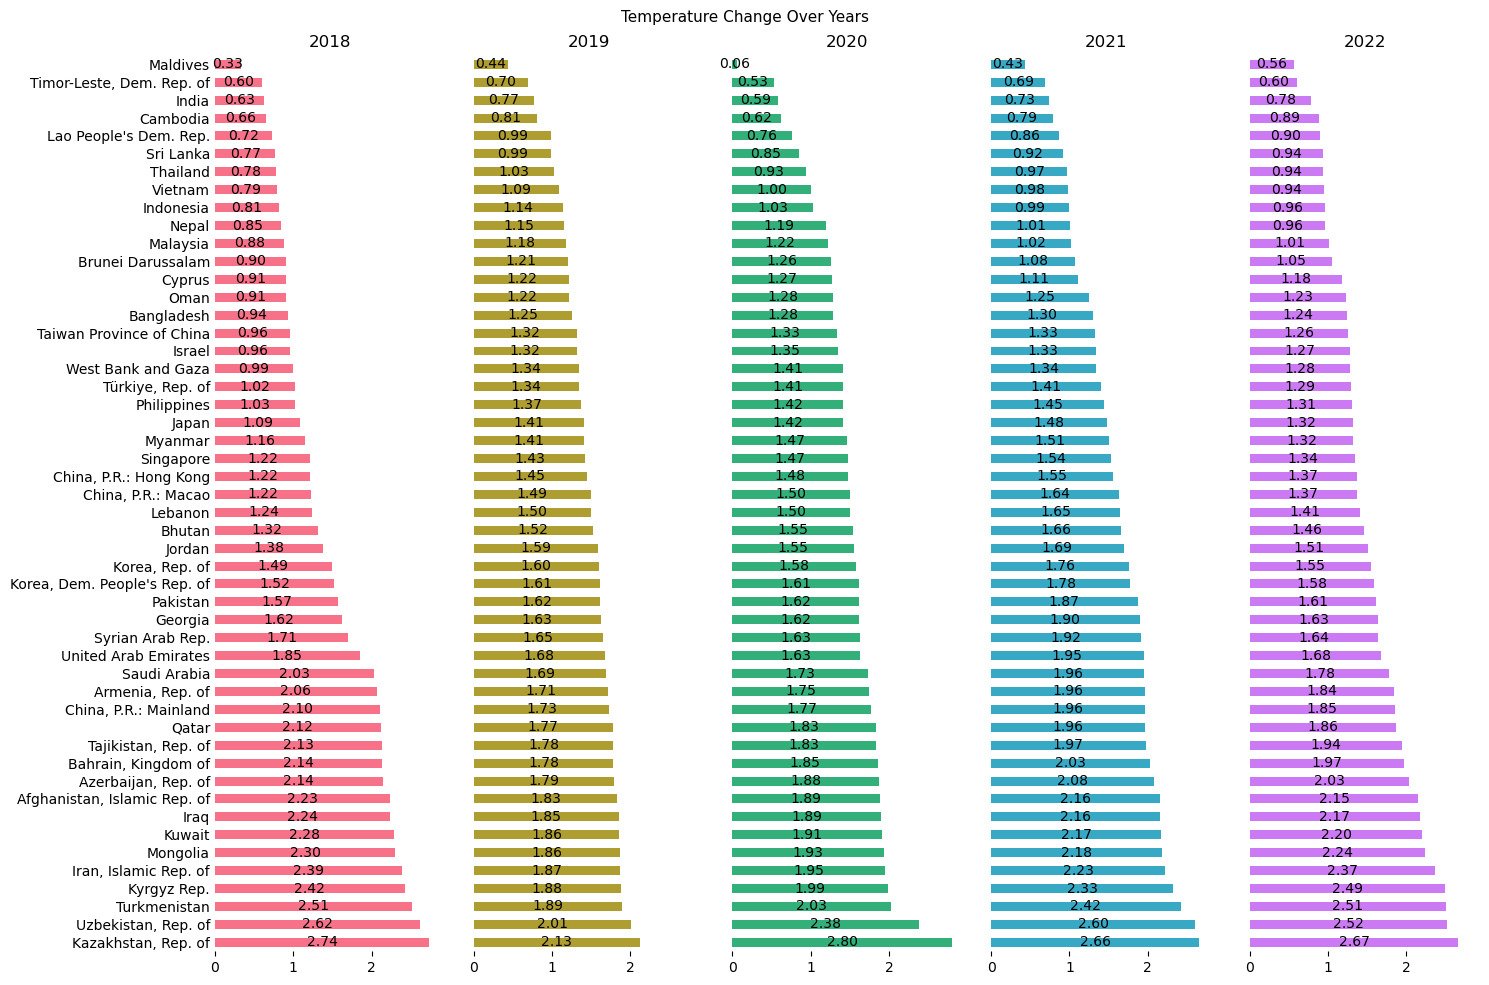

In [18]:
temperature_change_plot(ast)

Lấy Top3 nước có sự thay đổi nhiệt độ lớn nhất trong khu vự theo các năm

In [ ]:
def top_k_countries_by_year(df, years=None, topk=5):
    if years is None:
        years = [col for col in df.columns if col.isdigit()]
    for year in years:
        if year not in df.columns:
            print(f"Year {year} not found in the dataset.")
            continue

        top_k = df.sort_values(by=year, ascending=False).head(topk)

        print(f"Top {topk} countries for {year}:")
        for _, row in top_k.iterrows():
            print(f"Country: {row['Country']}, Value: {row[year]:.3f}")
        print('-' * 40)

In [32]:
top_k_countries_by_year(ast, topk=3)

Top 3 countries for 2018:
Country: Armenia, Rep. of, Value: 2.739
Country: Türkiye, Rep. of, Value: 2.617
Country: Georgia, Value: 2.514
----------------------------------------
Top 3 countries for 2019:
Country: Bahrain, Kingdom of, Value: 2.127
Country: Lao People's Dem. Rep., Value: 2.014
Country: Korea, Dem. People's Rep. of, Value: 1.889
----------------------------------------
Top 3 countries for 2020:
Country: Kazakhstan, Rep. of, Value: 2.800
Country: Mongolia, Value: 2.384
Country: Georgia, Value: 2.031
----------------------------------------
Top 3 countries for 2021:
Country: Iraq, Value: 2.661
Country: Kuwait, Value: 2.605
Country: Bahrain, Kingdom of, Value: 2.421
----------------------------------------
Top 3 countries for 2022:
Country: Kazakhstan, Rep. of, Value: 2.665
Country: Uzbekistan, Rep. of, Value: 2.520
Country: Turkmenistan, Value: 2.508
----------------------------------------
